In [2]:
%load_ext autoreload
%autoreload 2
%tb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


No traceback available to show.


In [3]:
import networkx as nx
from graph2plan.dcel.create import create_embedding
from graph2plan.dcel.extract_faces import extract_faces
from graph2plan.dual.examples import kant_G1, get_outer_face_st_graph, embed_other_target, embed_other_source
from sympy import Line, Point, sqrt

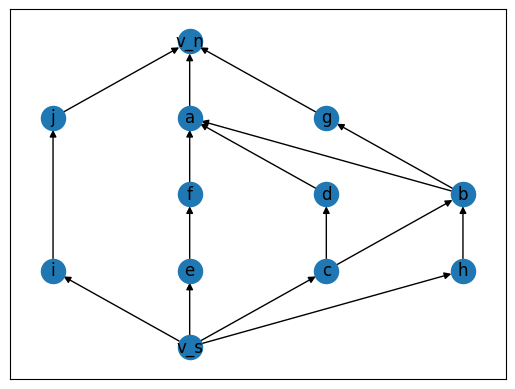

In [4]:
G, pos = kant_G1()
nx.draw_networkx(G, pos)

In [5]:
e = create_embedding(G, pos)
e.check_structure()
# f = extract_faces(e)
# f # int faces are order clockwise, while ext face is ccw

In [6]:
list(e.neighbors_cw_order("v_s"))

['i', 'e', 'c', 'h']

In [7]:
list(e.successors("v_s"))

['e', 'c', 'h', 'i']

In [24]:

e2 = embed_other_source(embed_other_target(e))


# vertex = "v_w"
# source, target = "v_s", "v_n"
# e1.add_half_edge_first(source, vertex)
# e1.add_half_edge_first(vertex, source)
# e1.add_half_edge_cw(vertex, target, reference_neighbor=source)


i
['v_w', 'i', 'e', 'c', 'h', 'v_e']
v_n nbs: ['v_e', 'g', 'a', 'j', 'v_w']
v_w nbs: ['v_s', 'v_n']


In [9]:
list(e1.neighbors_cw_order("v_s"))

['i', 'e', 'c', 'h', 'v_e']

In [ ]:

e2

i
['v_w', 'i', 'e', 'c', 'h', 'v_e']
v_n nbs: ['v_e', 'g', 'a', 'j', 'v_w']
v_w nbs: ['v_s', 'v_n']


In [20]:
list(e1.neighbors_cw_order("v_n"))

['v_e', 'g', 'a', 'j']

['v_w', 'v_e', 'i', 'e', 'c', 'h']

In [58]:
list(e1.neighbors_cw_order("v_w"))

['v_s']

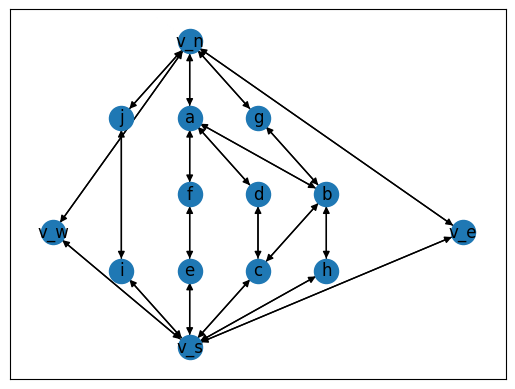

In [25]:
nx.draw_networkx(e2.to_directed(), pos)

In [27]:
e2.traverse_face("v_e", "v_n")

['v_e', 'v_n', 'v_w', 'v_s']

In [12]:
of = get_outer_face_st_graph(e, pos)
of.index("v_n")


4

In [ ]:
# v_s will for sure be in ext face, and ccw edge has v_s and its most clocwise nb 
e.traverse_face("v_s", "h")

['v_s', 'h', 'b', 'g', 'v_n', 'j', 'i']

In [ ]:
f


{1: ['v_s', 'i', 'j', 'v_n', 'a', 'f', 'e'],
 2: ['v_s', 'e', 'f', 'a', 'd', 'c'],
 3: ['v_s', 'c', 'b', 'h'],
 4: ['v_s', 'h', 'b', 'g', 'v_n', 'j', 'i'],
 5: ['c', 'd', 'a', 'b'],
 6: ['b', 'a', 'v_n', 'g']}

{1: ['v_s', 'i', 'j', 'v_n', 'a', 'f', 'e'],
 2: ['v_s', 'e', 'f', 'a', 'd', 'c'],
 3: ['v_s', 'c', 'b', 'h'],
 4: ['v_s', 'h', 'b', 'g', 'v_n', 'j', 'i'],
 5: ['c', 'd', 'a', 'b'],
 6: ['b', 'a', 'v_n', 'g']}

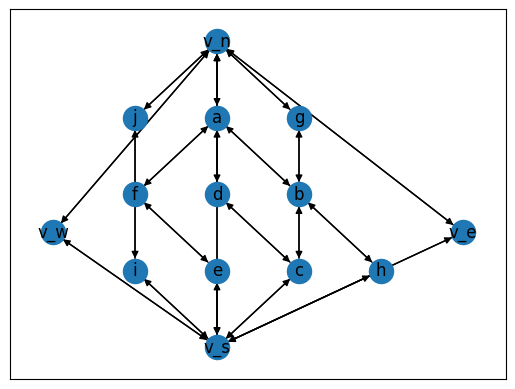

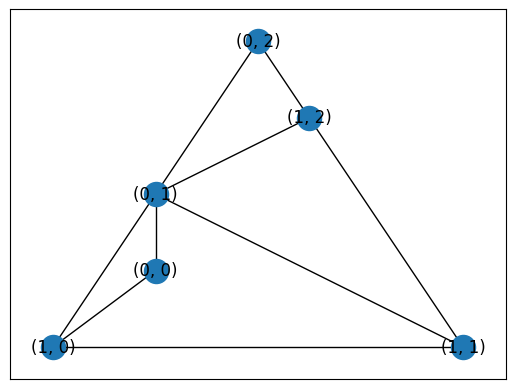

In [ ]:
G = nx.triangular_lattice_graph(2, 2)
pos = nx.planar_layout(G)
PG = create_embedding(G, pos)
nx.draw_networkx(G, pos)

In [ ]:
e = create_embedding(H, pos)

In [ ]:
v,w = ((0, 0), (0, 1))
print(e.traverse_face(v,w))
e.traverse_face(*e.next_face_half_edge(v,w))

[(0, 0), (0, 1), (1, 1), (1, 0)]


[(0, 1), (1, 1), (1, 0), (0, 0)]

In [ ]:
f = extract_faces(e)

==>> face: [(0, 0), (0, 1), (1, 1), (1, 0)]
==>> face: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 1)]
==>> face: [(1, 0), (1, 1), (2, 1), (2, 0)]
==>> face: [(0, 1), (0, 2), (1, 2), (1, 1)]
==>> face: [(1, 1), (1, 2), (2, 2), (2, 1)]
==>> face: [(2, 0), (2, 1), (3, 1), (3, 0)]
==>> face: [(2, 1), (2, 2), (3, 2), (3, 1)]
==>> face: [(3, 0), (3, 1), (4, 1), (4, 0)]
==>> face: [(3, 1), (3, 2), (4, 2), (4, 1)]
num_faces: 9


In [ ]:
f

{1: [(0, 0), (0, 1), (1, 1), (1, 0)],
 2: [(0, 0),
  (1, 0),
  (2, 0),
  (3, 0),
  (4, 0),
  (4, 1),
  (4, 2),
  (3, 2),
  (2, 2),
  (1, 2),
  (0, 2),
  (0, 1)],
 3: [(1, 0), (1, 1), (2, 1), (2, 0)],
 4: [(0, 1), (0, 2), (1, 2), (1, 1)],
 5: [(1, 1), (1, 2), (2, 2), (2, 1)],
 6: [(2, 0), (2, 1), (3, 1), (3, 0)],
 7: [(2, 1), (2, 2), (3, 2), (3, 1)],
 8: [(3, 0), (3, 1), (4, 1), (4, 0)],
 9: [(3, 1), (3, 2), (4, 2), (4, 1)]}